In [8]:
import numpy as np
from numpy import linalg
import scipy as sp
from scipy.special import factorial
from scipy import sparse
from scipy.sparse import csr_matrix,coo_matrix

# CXXIII p.33
# CXXV p.81

class Pairfrag:
    def __init__(self,numPtcl):
        self.N=numPtcl
        N=self.N
        gg=np.zeros((N+1,N+1))
        c=0
        for l in range(N+1):
            for m in range(N+1):
                gg[l,m]=c
                c+=1
        self.g=gg


    ### A is a sparse matrix that defines the fragments.

    def A(self,theta1,theta2):
        N=self.N
        g=self.g
        ## a corresponds to a_{0}^{*2}
        arow=[]
        acol=[]
        adata=[]
        for k in range(N+1):
            for j in range(N-1):
                acol.append(g[j,k])
                arow.append(g[j+2,k])
                adata.append(np.sqrt(j+1)*np.sqrt(j+2))
        ## c corresponds to a_{0}^{*}a_{1}^{*}
        crow=[]
        ccol=[]
        cdata=[]
        for k in range(N):
            for j in range(N):
                ccol.append(g[k,j])
                crow.append(g[k+1,j+1])
                cdata.append(np.sqrt(j+1)*np.sqrt(k+1))
        ## d corresponds to a_{1}^{*2}
        drow=[]
        dcol=[]
        ddata=[]
        for k in range(N+1):
            for j in range(N-1):
                dcol.append(g[k,j])
                drow.append(g[k,j+2])
                ddata.append(np.sqrt(j+1)*np.sqrt(j+2))

        arow=np.int_(np.asarray(arow))
        acol=np.int_(np.asarray(acol) )
        crow=np.int_(np.asarray(crow))
        ccol=np.int_(np.asarray(ccol) )
        drow=np.int_(np.asarray(drow))
        dcol=np.int_(np.asarray(dcol) )
        adata=np.asarray(adata)
        cdata=np.asarray(cdata)
        ddata=np.asarray(ddata)

        AA=csr_matrix((adata, (arow, acol)), shape=((N+1)**2, (N+1)**2))
        CC=csr_matrix((cdata, (crow, ccol)), shape=((N+1)**2, (N+1)**2))
        DD=csr_matrix((ddata, (drow, dcol)), shape=((N+1)**2, (N+1)**2))

        H=((np.sin(theta1)*np.cos(theta2)*(1/np.sqrt(2))*AA)+(np.cos(theta1)*CC)+(np.sin(theta1)*np.sin(theta2)*(1/np.sqrt(2))*DD))
        return H

    def state(self,theta1,theta2,theta3,theta4,m):
        N=self.N
        g=self.g
        mm=m
        if mm>N/4:
            return print('m must be less than or equal to N/4')
        else:

            ms=np.zeros((N+1)**2)
            ms[0]=1

            xx=ms
            #Apply the factors in alternation up to the number defining the smallest fragment
            for j in range(mm):
                xx=( self.A(theta1,theta2).dot(xx) )/np.linalg.norm(xx)
                xx=( self.A(theta3,theta4).dot(xx) )/np.linalg.norm(xx)
            #Apply the remaining factors
            for j in range(np.int((N/2)-(2*mm))):
                xx=( self.A(theta1,theta2).dot(xx) )/np.linalg.norm(xx)

            state=[]

            for k in range(N+1):
                state.append(xx[np.int(g[N-k,k])])
            state=np.asarray(state)
            state=state/np.linalg.norm(state)
        return state

class Pcs:
    def __init__(self,numPtcl):
        self.N=numPtcl
        N=self.N
        gg=np.zeros((N+1,N+1))
        c=0
        for l in range(N+1):
            for m in range(N+1):
                gg[l,m]=c
                c+=1
        self.g=gg


    ### A is a sparse matrix that defines the fragments.

    def A(self,theta1,theta2):
        N=self.N
        g=self.g
        ## a corresponds to a_{0}^{*2}
        arow=[]
        acol=[]
        adata=[]
        for k in range(N+1):
            for j in range(N-1):
                    acol.append(g[j,k])
                    arow.append(g[j+2,k])
                    adata.append(np.sqrt(j+1)*np.sqrt(j+2))
        ## c corresponds to a_{0}^{*}a_{1}^{*}
        crow=[]
        ccol=[]
        cdata=[]
        for k in range(N):
            for j in range(N):
                    ccol.append(g[k,j])
                    crow.append(g[k+1,j+1])
                    cdata.append(np.sqrt(j+1)*np.sqrt(k+1))
        ## d corresponds to a_{1}^{*2}
        drow=[]
        dcol=[]
        ddata=[]
        for k in range(N+1):
            for j in range(N-1):
                    dcol.append(g[k,j])
                    drow.append(g[k,j+2])
                    ddata.append(np.sqrt(j+1)*np.sqrt(j+2))

        arow=np.int_(np.asarray(arow))
        acol=np.int_(np.asarray(acol) )
        crow=np.int_(np.asarray(crow))
        ccol=np.int_(np.asarray(ccol) )
        drow=np.int_(np.asarray(drow))
        dcol=np.int_(np.asarray(dcol) )
        adata=np.asarray(adata)
        cdata=np.asarray(cdata)
        ddata=np.asarray(ddata)
        AA=csr_matrix((adata, (arow, acol)), shape=((N+1)**2, (N+1)**2))
        CC=csr_matrix((cdata, (crow, ccol)), shape=((N+1)**2, (N+1)**2))
        DD=csr_matrix((ddata, (drow, dcol)), shape=((N+1)**2, (N+1)**2))
        #Taking the matrix power via ** gives a reliable state only for small N (N\lesssim 100). However, one can take a small power to reduce the
        #number of matrix multiplications during state generation.
        H=((np.sin(theta1)*np.cos(theta2)*(1/np.sqrt(2))*AA)+(np.cos(theta1)*CC)+(np.sin(theta1)*np.sin(theta2)*(1/np.sqrt(2))*DD))
        return H

    def pcsstate(self,theta1,theta2):
        N=self.N
        g=self.g

        ms=np.zeros((N+1)**2)
        ms[0]=1

        xx=ms
        for j in range(np.int(N/2)):
            xx=( self.A(theta1,theta2).dot(xx) )/np.linalg.norm(xx)
        state=[]

        for k in range(N+1):
            state.append(xx[np.int(g[N-k,k])])
        state=np.asarray(state)
        state=state/np.linalg.norm(state)
        return state
    
class Jastrow:
    def __init__(self,numPtcl):
        self.N=numPtcl
    def jasstate(self,a):
        N=self.N
        state=np.zeros(N+1)
        state[0]=1
        for k in range(N):
            #state[k+1]=state[k]*np.sqrt((k+1)/(N-k))*(a**((2*k)))*(b**(-(2*k)))*(c**(2*k))
            state[k+1]=state[k]*np.sqrt((k+1)/(N-k))*(a**((2*k)))
        state=state/np.linalg.norm(state)
        return state
            

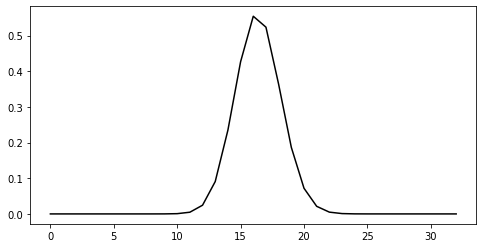

In [9]:
import numpy as np
from numpy import linalg
import scipy as sp
from scipy.special import factorial
from scipy import sparse
from scipy.sparse import csr_matrix,coo_matrix
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt



# #Generate state instance
# test=frag.Arbfrag(N)
# test.N
# teststate=test.state(32,-np.pi/4,-np.pi/6)
# #Check the basis indices
# test.g()
#
#
# #Plot the state
# plt.figure(figsize=(8,4))
# axes = plt.gca()
# axes.plot(teststate,'k-')
# np.sum(np.square(teststate))

#Pair fragmented state
#Number of particles
N=32
#Generate state instance
test=Pairfrag(N)
state=test.state(.1,np.pi/3,np.pi/4,np.pi/4,3)
#Plot the state
plt.figure(figsize=(8,4))
axes = plt.gca()
axes.plot(state,'k-')

# #PCS state
# #Number of particles
# N=32
# #Generate state instance
# test=Pcs(N)
# state=test.pcsstate(0,0)
# #Plot the state
# plt.figure(figsize=(8,4))
# axes = plt.gca()
# axes.plot(state,'k-')

# #Jastrow state
# #Number of particles
# N=32
# #Generate state instance
# test=Jastrow(N)
# state=test.jasstate(.9994)
# #Plot the state
# plt.figure(figsize=(8,4))
# axes = plt.gca()
# axes.plot(state,'k-')

In [3]:
test.N

32

In [ ]:
N=32
#Generate state instance
test=Pcs(N)
state=test.pcsstate(.1,np.pi/4)

In [ ]:
state

In [ ]:
mm